In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Đọc dữ liệu đầu vào

In [2]:
data_df = pd.read_csv("../data/coronavirus/coronavirus0410.csv", index_col="Country,Other")
data_df.head()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
USA,"31,802,772",NaN,"574,840",NaN,"24,346,766",NaN,"6,881,166","9,078","95,647","1,729","416,789,330","1,253,501","332,500,290",2021-04-10
Brazil,"13,375,414",NaN,"348,934",NaN,"11,791,885",NaN,"1,234,595","8,318","62,582","1,633","28,600,000","133,817","213,724,704",2021-04-10
India,"13,205,926","+3,143","168,467",NaN,"11,990,859","+2,919","1,046,600","8,944","9,498",121,"255,214,803","183,547","1,390,456,911",2021-04-10
France,"4,980,501",NaN,"98,395",NaN,"303,639",NaN,"4,578,467","5,729","76,172","1,505","68,007,540","1,040,108","65,385,105",2021-04-10
Russia,"4,623,984",NaN,"102,247",NaN,"4,248,700",NaN,"273,037","2,300","31,675",700,"123,000,000","842,565","145,982,840",2021-04-10


In [3]:
data_df.shape

(221, 14)

In [4]:
data_df.dtypes

TotalCases           object
NewCases             object
TotalDeaths          object
NewDeaths           float64
TotalRecovered       object
NewRecovered         object
ActiveCases          object
Serious,Critical     object
Tot Cases/1M pop     object
Deaths/1M pop        object
TotalTests           object
Tests/1M pop         object
Population           object
Date                 object
dtype: object

In [5]:
obj_col = set(data_df.select_dtypes(include=['object']).columns)-set(["Date"])
def convert(df):
    if df.name in obj_col:
        df = pd.to_numeric(df.str.replace(",", ""), errors='coerce')
    return df
data_df=data_df.apply(convert)

In [6]:
data_df.dtypes

TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
Population          float64
Date                 object
dtype: object

In [7]:
data_df.isna().sum()

TotalCases            0
NewCases            208
TotalDeaths          15
NewDeaths           212
TotalRecovered        2
NewRecovered        208
ActiveCases           2
Serious,Critical     76
Tot Cases/1M pop      2
Deaths/1M pop        17
TotalTests           12
Tests/1M pop         12
Population            2
Date                  0
dtype: int64

In [8]:
def missing_ratio(df):
    return df.isna().sum()/len(df)

missing_ratio = data_df.loc[:,data_df.columns != "Date"].apply(missing_ratio)#.apply('{:.3%}'.format)
sum=  data_df.loc[:,data_df.columns != "Date"].agg('sum').apply('{:3}'.format)
info_df = pd.DataFrame([missing_ratio, sum], index=["Missing Ratio", "Sum"])
info_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
Missing Ratio,0,0.941176,0.0678733,0.959276,0.00904977,0.941176,0.00904977,0.343891,0.00904977,0.0769231,0.0542986,0.0542986,0.00904977
Sum,135315183.0,25314.0,2928782.0,1098.0,108859547.0,25624.0,21365034.0,102124.0,6278379.0,103330.3,1976710135.0,115559796.0,7817558576.0


In [9]:
pd.options.display.float_format = '{:.2f}'.format
data_df

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
USA,31802772,nan,574840.00,nan,24346766.00,nan,6881166.00,9078.00,95647.00,1729.00,416789330.00,1253501.00,332500290.00,2021-04-10
Brazil,13375414,nan,348934.00,nan,11791885.00,nan,1234595.00,8318.00,62582.00,1633.00,28600000.00,133817.00,213724704.00,2021-04-10
India,13205926,3143.00,168467.00,nan,11990859.00,2919.00,1046600.00,8944.00,9498.00,121.00,255214803.00,183547.00,1390456911.00,2021-04-10
France,4980501,nan,98395.00,nan,303639.00,nan,4578467.00,5729.00,76172.00,1505.00,68007540.00,1040108.00,65385105.00,2021-04-10
Russia,4623984,nan,102247.00,nan,4248700.00,nan,273037.00,2300.00,31675.00,700.00,123000000.00,842565.00,145982840.00,2021-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marshall Islands,4,nan,nan,nan,4.00,nan,0.00,nan,67.00,nan,nan,nan,59498.00,2021-04-10
Samoa,3,nan,nan,nan,2.00,nan,1.00,nan,15.00,nan,nan,nan,199431.00,2021-04-10
Vanuatu,3,nan,nan,nan,1.00,nan,2.00,nan,10.00,nan,470.00,1503.00,312643.00,2021-04-10


In [10]:
# data_df.fillna(data_df.mean(), inplace=True)
data_df.sort_values(by="TotalCases", ascending=False)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date
"Country,Other",,,,,,,,,,,,,,
USA,31802772,nan,574840.00,nan,24346766.00,nan,6881166.00,9078.00,95647.00,1729.00,416789330.00,1253501.00,332500290.00,2021-04-10
Brazil,13375414,nan,348934.00,nan,11791885.00,nan,1234595.00,8318.00,62582.00,1633.00,28600000.00,133817.00,213724704.00,2021-04-10
India,13205926,3143.00,168467.00,nan,11990859.00,2919.00,1046600.00,8944.00,9498.00,121.00,255214803.00,183547.00,1390456911.00,2021-04-10
France,4980501,nan,98395.00,nan,303639.00,nan,4578467.00,5729.00,76172.00,1505.00,68007540.00,1040108.00,65385105.00,2021-04-10
Russia,4623984,nan,102247.00,nan,4248700.00,nan,273037.00,2300.00,31675.00,700.00,123000000.00,842565.00,145982840.00,2021-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS Zaandam,9,nan,2.00,nan,7.00,nan,0.00,nan,nan,nan,nan,nan,nan,2021-04-10
Marshall Islands,4,nan,nan,nan,4.00,nan,0.00,nan,67.00,nan,nan,nan,59498.00,2021-04-10
Samoa,3,nan,nan,nan,2.00,nan,1.00,nan,15.00,nan,nan,nan,199431.00,2021-04-10


In [11]:
# # data_df["TotalCases"].plot(kind='pie')
# threshold = 2504206
# part = data_df[data_df["TotalCases"] >=threshold]["TotalCases"]
# other = pd.Series({"Other":data_df[data_df["TotalCases"] <threshold]["TotalCases"].sum()})
# total=pd.concat([part, other])
# ax=total.plot.pie(autopct='%1.1f%%', figsize=(25, 10), labels=None, legend='best')
# plt.title("Tỉ lệ số ca mắc bệnh trên toàn thế giới theo các nước")
# plt.show()
# # ax.text(x=total.index, y= total.values, s=total)


In [12]:
data_df["TotalCases"]/data_df["Population"]*10**7

Country,Other
USA                956473.51
Brazil             625824.43
India               94975.44
France             761717.98
Russia             316748.46
                      ...   
Marshall Islands      672.29
Samoa                 150.43
Vanuatu                95.96
Micronesia             86.24
China                 628.07
Length: 221, dtype: float64

In [13]:
# death=data_df.iloc[:15,1].sort_values(ascending=True)
# plt.figure(figsize=(12, 6))
# ax=sns.barplot(y=death.index, x = death.values, orient="h")
# ax.set_title("Tổng số người chết tại một số nước trên thế giới")
# # plt.title("Tổng số người chết tại một số nước trên thế giới")

Chọn các thuộc tính TotalCasess, TotalDeaths, TotalRecovered, ActiveCases, TotalTests, Population

In [14]:
df = data_df[["TotalCases", "TotalDeaths", "TotalRecovered", "ActiveCases", "Serious,Critical", "TotalTests", "Population"]]
df.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotalTests,Population
count,221.00,206.00,219.00,219.00,145.00,209.00,219.00
mean,612285.90,14217.39,497075.56,97557.23,704.30,9457943.23,35696614.50
std,2569863.34,52972.91,2069764.98,570882.17,1594.07,38056091.75,140295518.67
min,1.00,1.00,1.00,0.00,1.00,470.00,803.00
25%,4329.00,93.25,3107.50,243.50,13.00,111994.00,644973.50
50%,37147.00,748.50,28161.00,3093.00,82.00,842015.00,6606892.00
75%,266677.00,5579.00,224323.00,26163.50,483.00,4153203.00,24362032.50
max,31802772.00,574840.00,24346766.00,6881166.00,9078.00,416789330.00,1439323776.00


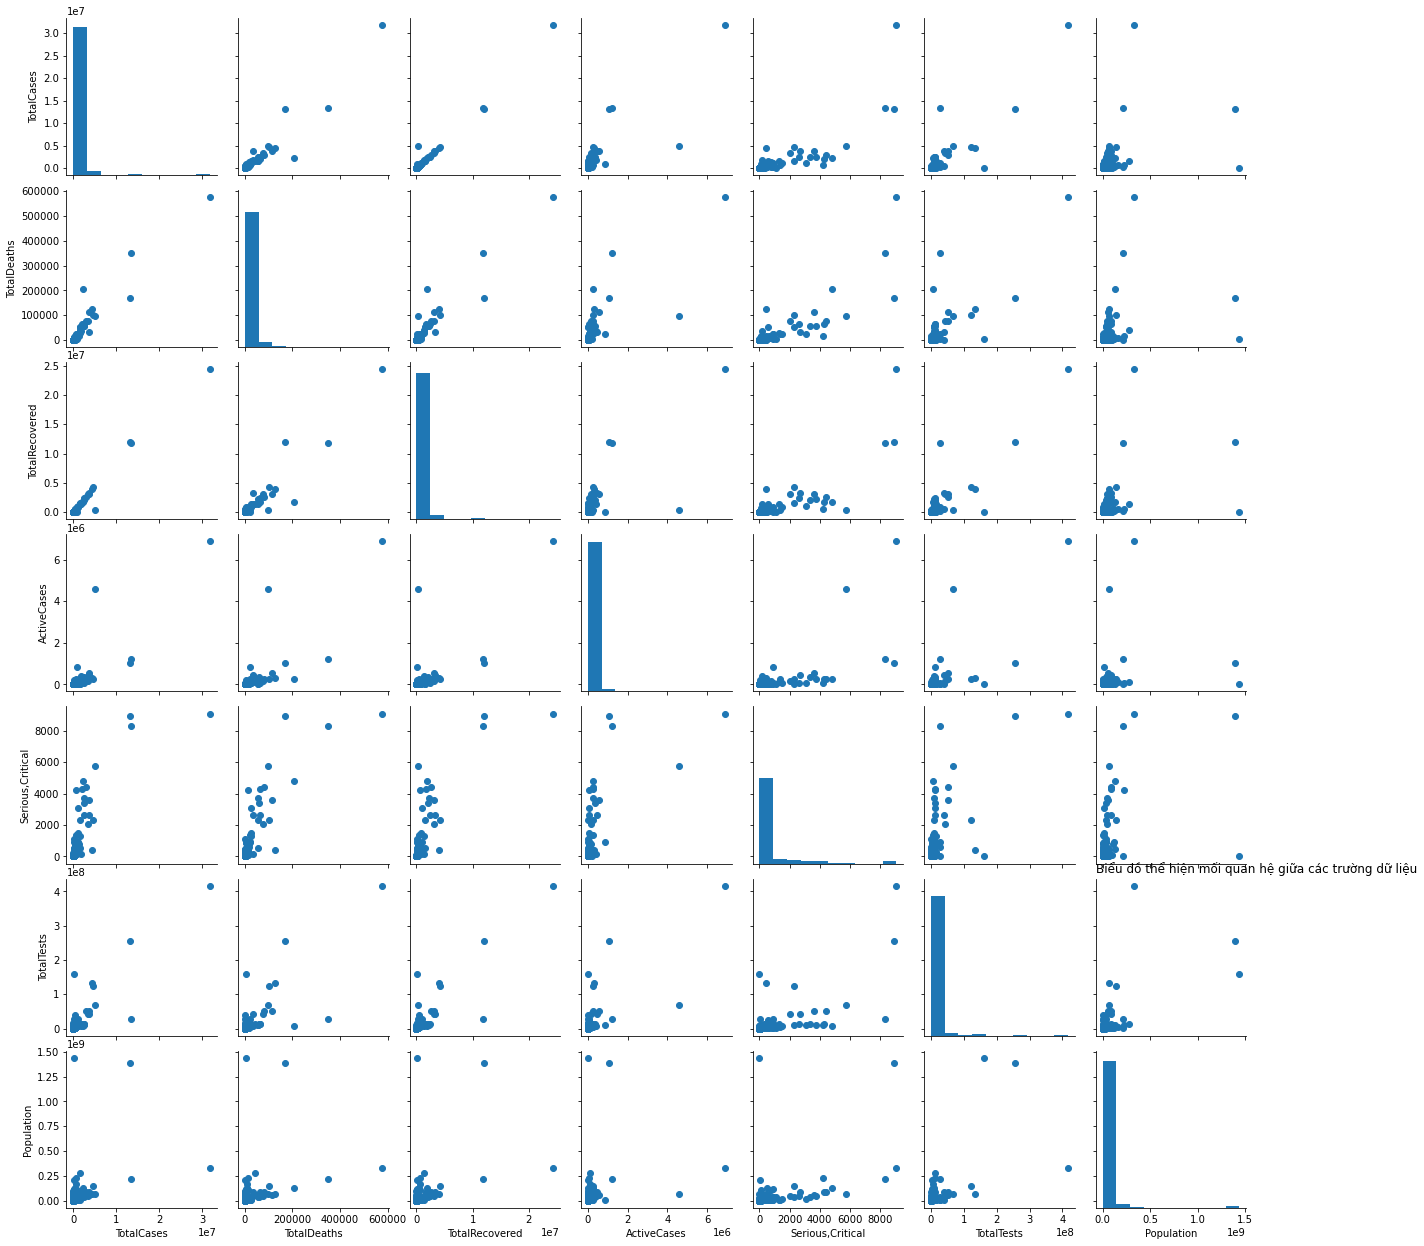

In [15]:
g = sns.PairGrid(df)
# g.map(plt.scatter)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.title("Biểu đồ thể hiện mối quan hệ giữa các trường dữ liệu", loc='left')
plt.show()

# Các trường dữ liệu

- Đễ dàng biểu diễn. ta chỉ chọn ra top 10 quốc gia, vùng lãnh thổ có số ca lây nhiễm lớn

In [16]:
df_10 = data_df.sort_values(by="TotalCases", ascending=False).head(10)
# df_10

In [17]:
def draw(df, top, col):
    data=df.sort_values(by=col, ascending=False)[:top]
    fig, axs =plt.subplots(1,2)
    fig.tight_layout()
    title_ = "Top " + str(top) + " of "+ col
    data[col].plot(kind='barh',figsize=(20, 6), title=title_, color='green', ax=axs[0])
    data[col].plot(kind='pie', autopct='%1.1f%%',figsize=(20, 6), labels=None, ax=axs[1], legend='auto')
    plt.show()
top=10

## Trường dữ liệu TotalDeaths

In [18]:
feature = "TotalDeaths"
print("Một số tính chất của TotalDeaths")
df[feature].describe()

Một số tính chất của TotalDeaths


count      206.00
mean     14217.39
std      52972.91
min          1.00
25%         93.25
50%        748.50
75%       5579.00
max     574840.00
Name: TotalDeaths, dtype: float64

Text(0.5, 0, 'TotalDeaths')

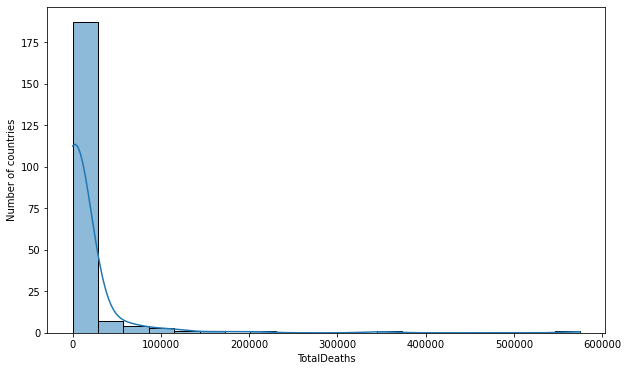

In [19]:
# df[feature].hist()
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

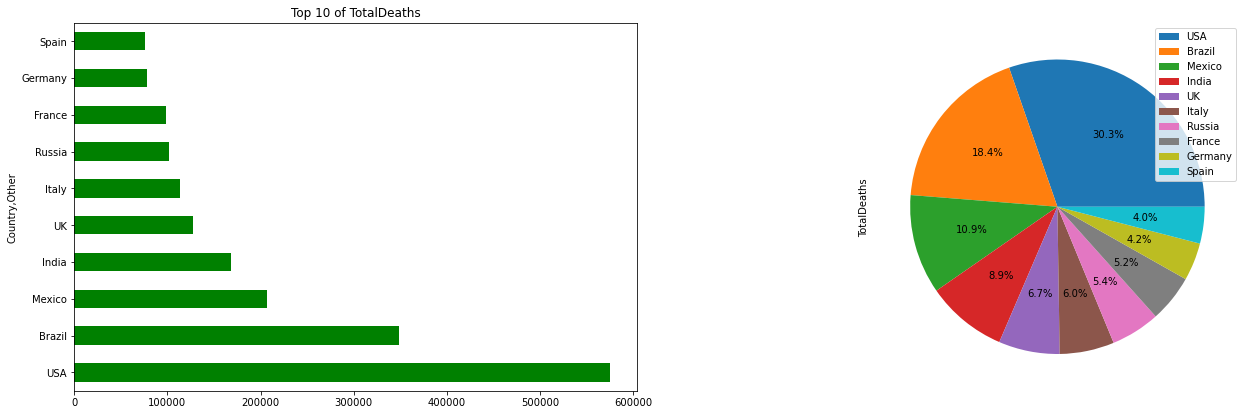

In [20]:
draw(df, top, feature)

## Trường dữ liệu TotalCases

In [21]:
feature = "TotalCases"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của TotalCases


count        221.00
mean      612285.90
std      2569863.34
min            1.00
25%         4329.00
50%        37147.00
75%       266677.00
max     31802772.00
Name: TotalCases, dtype: float64

Text(0.5, 0, 'TotalCases')

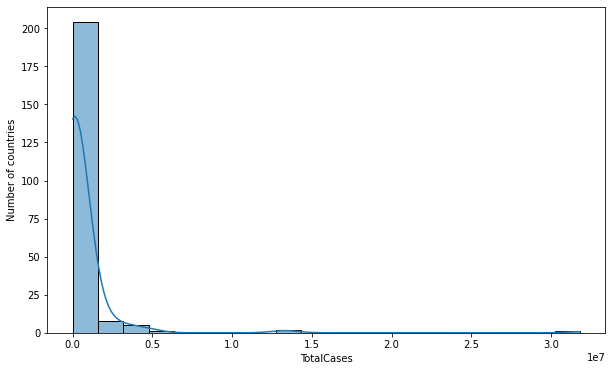

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

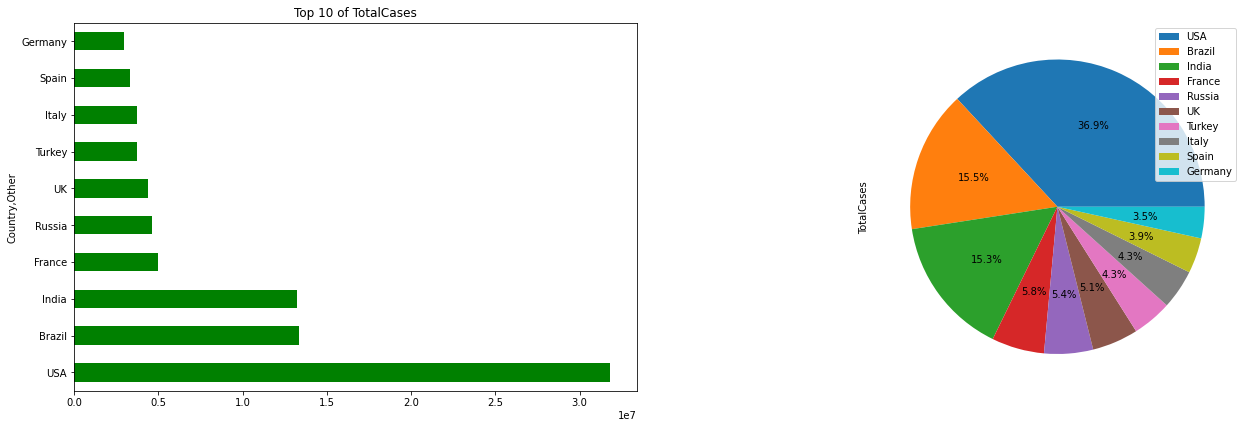

In [23]:
draw(df, top, feature)

## Trường dữ liệu TotalRecovered

In [24]:
feature = "TotalRecovered"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của TotalRecovered


count        219.00
mean      497075.56
std      2069764.98
min            1.00
25%         3107.50
50%        28161.00
75%       224323.00
max     24346766.00
Name: TotalRecovered, dtype: float64

Text(0.5, 0, 'TotalRecovered')

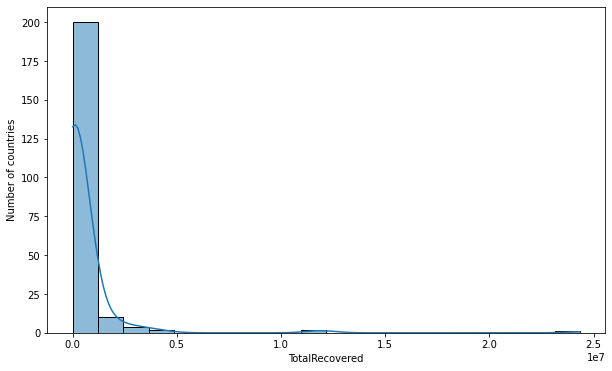

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

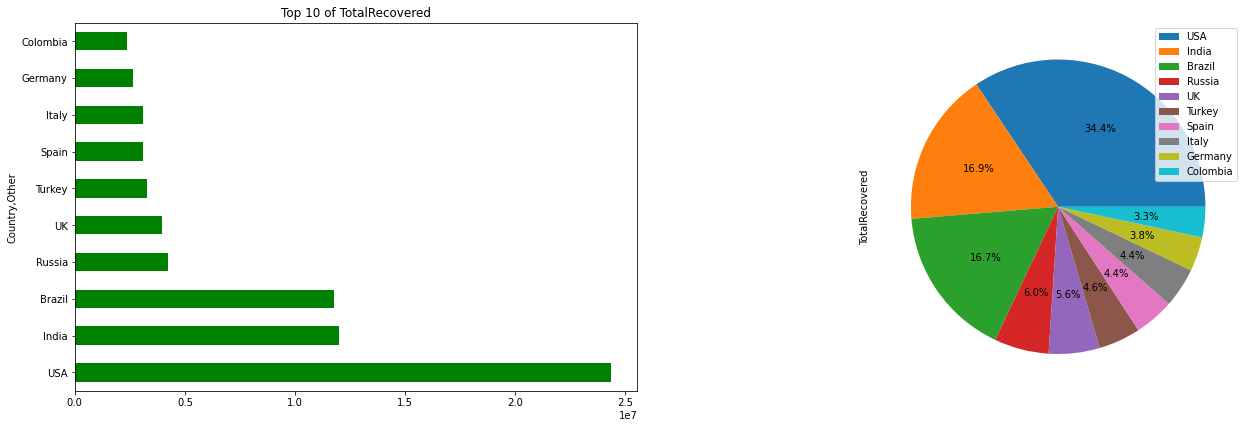

In [26]:
draw(df, top, feature)

## Trường dữ liệu ActiveCases

In [27]:
feature = "ActiveCases"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của ActiveCases


count       219.00
mean      97557.23
std      570882.17
min           0.00
25%         243.50
50%        3093.00
75%       26163.50
max     6881166.00
Name: ActiveCases, dtype: float64

Text(0.5, 0, 'ActiveCases')

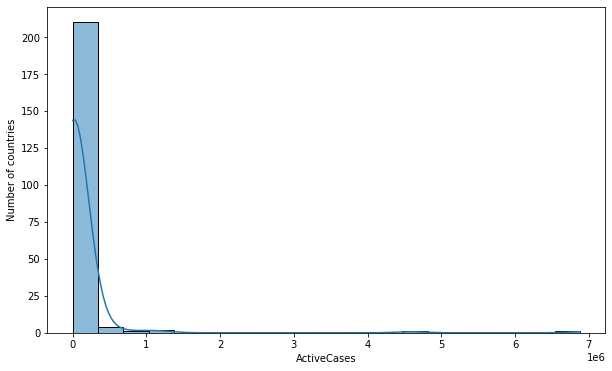

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

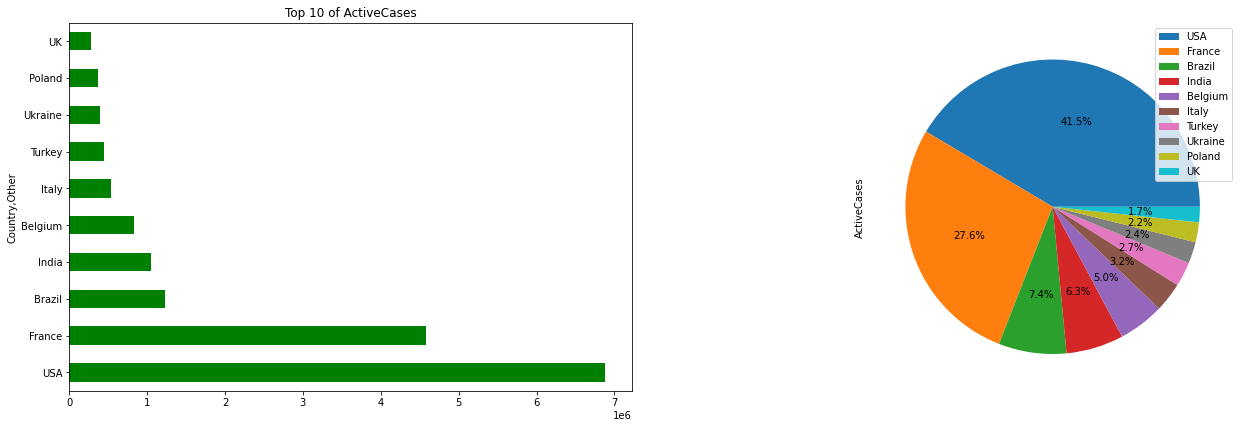

In [29]:
draw(df, top, "ActiveCases")

 ## Trường dữ liệu TotalTests

In [30]:
feature = "TotalTests"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của TotalTests


count         209.00
mean      9457943.23
std      38056091.75
min           470.00
25%        111994.00
50%        842015.00
75%       4153203.00
max     416789330.00
Name: TotalTests, dtype: float64

Text(0.5, 0, 'TotalTests')

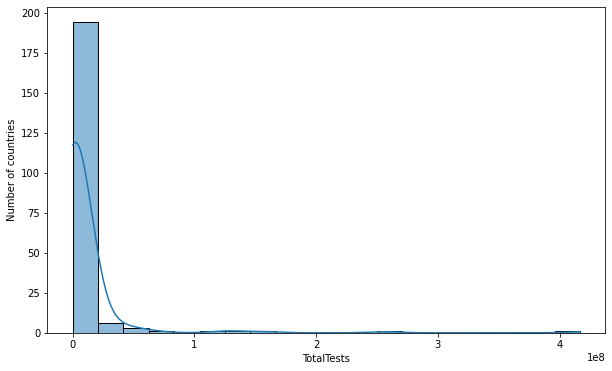

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

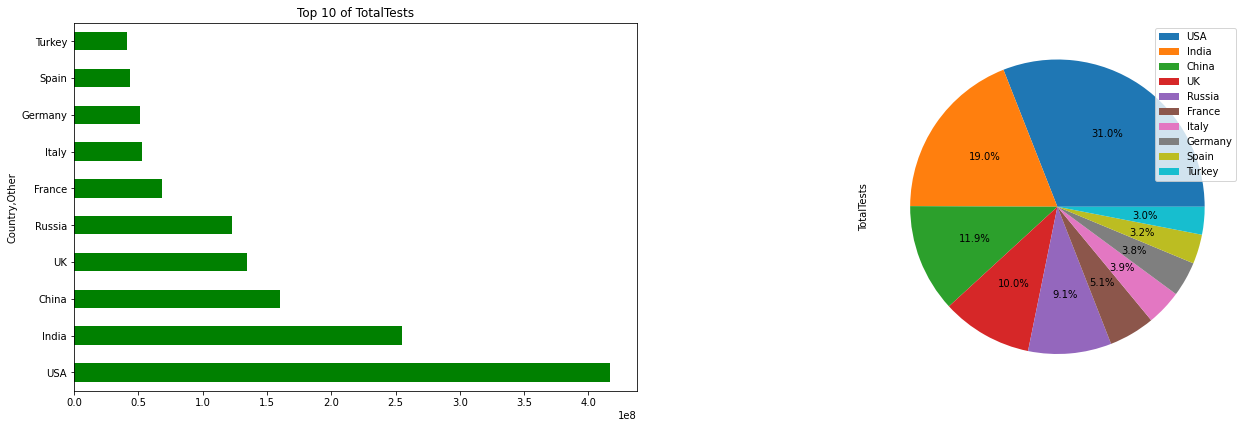

In [32]:
draw(df, top, "TotalTests")

## Trường dữ liệu Population

In [33]:
feature = "Population"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của Population


count          219.00
mean      35696614.50
std      140295518.67
min            803.00
25%         644973.50
50%        6606892.00
75%       24362032.50
max     1439323776.00
Name: Population, dtype: float64

Text(0.5, 0, 'Population')

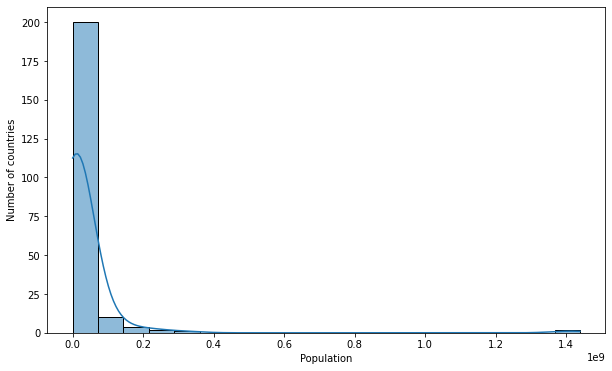

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

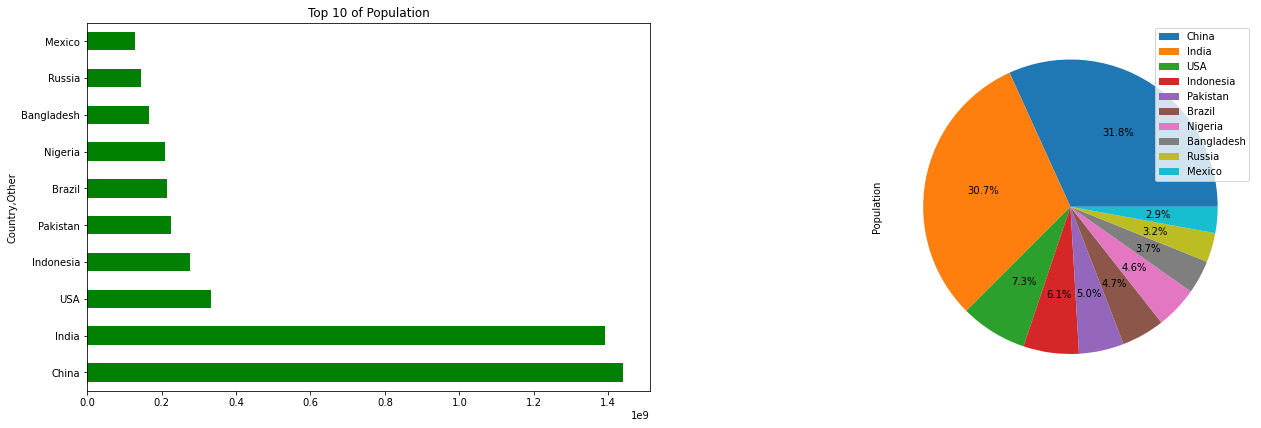

In [35]:
draw(df, top, "Population")

## Trường dữ liệu Serious,Critical

In [36]:
feature = "Serious,Critical"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của Serious,Critical


count    145.00
mean     704.30
std     1594.07
min        1.00
25%       13.00
50%       82.00
75%      483.00
max     9078.00
Name: Serious,Critical, dtype: float64

Text(0.5, 0, 'Serious,Critical')

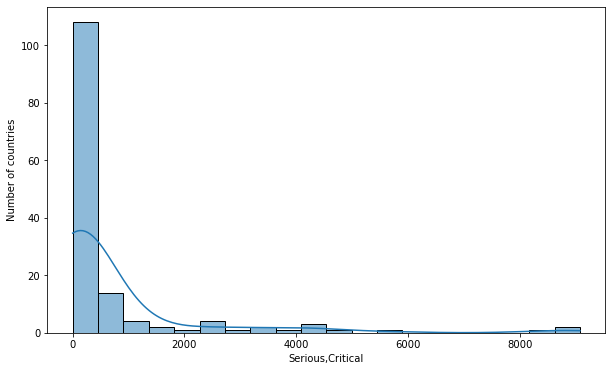

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

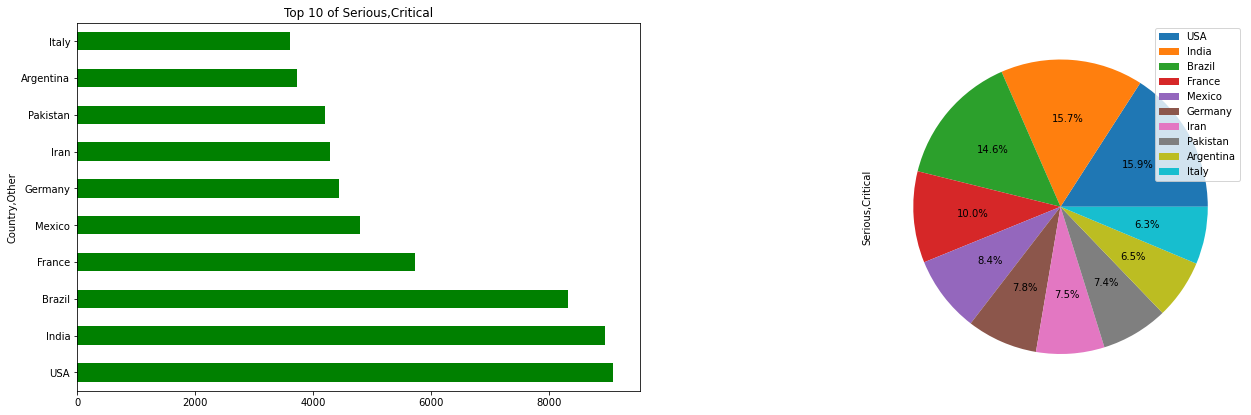

In [38]:
draw(df, top, feature)

# Mối quan hệ giữa các trường dữ liệu

## Mối tương quan theo cặp

In [39]:
# corr = df.corr()
# # corr
# sns.set_theme()
# plt.figure(figsize=(10, 10))
# # mask = np.zeros_like(corr)
# # mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(
#     corr, 
#     annot=True,
#     vmin=-1, vmax=1, center=0,
#     cmap = 'Greens',
# #     cmap=sns.diverging_palette(20, 20, n=240),
# #     mask = mask,
#     square=True,
    
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

In [40]:
# corr = df.corr(method='spearman')
# # corr
# sns.set_theme(style='whitegrid')
# plt.figure(figsize=(10, 10))
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# ax = sns.heatmap(
#     corr, 
#     annot=True,
#     vmin=-1, vmax=1, center=0,
#     cmap = 'Greens',
# #     cmap=sns.diverging_palette(20, 20, n=240),
#     mask = mask,
#     square=True,
    
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

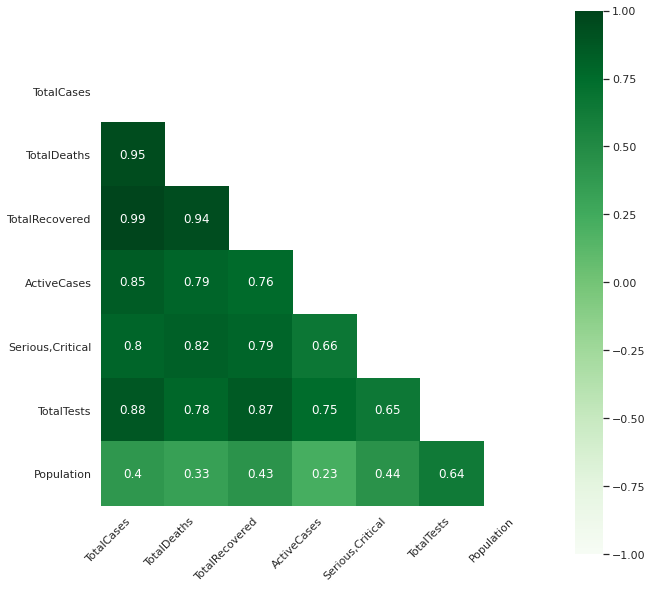

In [41]:
num_cols =df.select_dtypes(exclude='object').columns
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
colTransform = ColumnTransformer(transformers =[('numerical', imp_mean, num_cols)])
colNormalize=StandardScaler()
new_df = colTransform.fit_transform(df)
new_df = colNormalize.fit_transform(new_df)
df = pd.DataFrame(new_df, columns = ["TotalCases", "TotalDeaths", "TotalRecovered", "ActiveCases", "Serious,Critical", "TotalTests", "Population"])
corr = df.corr(method='pearson')
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(
    corr, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap = 'Greens',
#     cmap=sns.diverging_palette(20, 20, n=240),
    mask = mask,
    square=True,
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

$\rightarrow$ Dựa vào biểu đồ heatmap của corr, ta thấy, TotalDeaths-TotalCases, TotalRecovered-TotalCases, TotalRecovered-TotalDeaths, ActiveCases-TotalCases, TotalTests-TotalRecovered, TotalTests-TotalCases có hệ số tương quan lớn ( > 0.85) \
$\rightarrow$ có khả năng đồng biến với nhau

In [42]:
def corr(x,y):
    slope, intercept, r,p, stderr = scipy.stats.linregress(x, y)
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x,r={r:.2f}'
    print(scipy.stats.kendalltau(x, y))
    fig, ax=plt.subplots(figsize=(8, 6))
    ax.plot(x,y,linewidth=0, marker='s', label='Data points')
    ax.plot(x, intercept + slope * x,label=line)
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)
    ax.legend(facecolor='white')
    plt.show()

### TotalCases và TotalDeaths

KendalltauResult(correlation=0.6438092241837731, pvalue=8.925263968324029e-46)


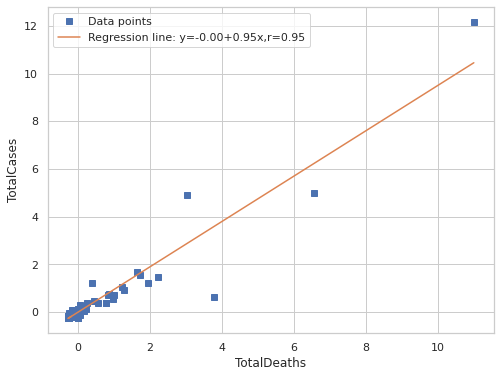

In [43]:
Y = df["TotalCases"]
X = df["TotalDeaths"]
corr(X, Y)


### TotalCases và TotalTest

KendalltauResult(correlation=0.5987523645711567, pvalue=5.963198926018051e-40)


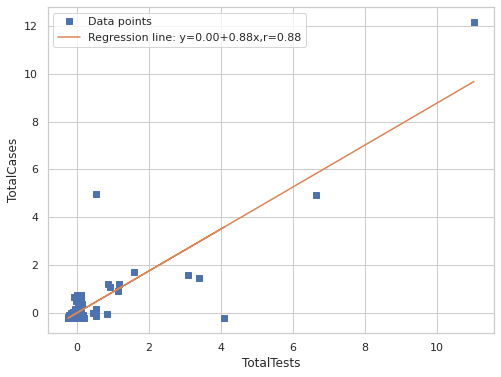

In [44]:
X = df["TotalTests"]
Y=df["TotalCases"]
corr(X, Y)

### TotalRecovered và TotalDeaths

KendalltauResult(correlation=0.6184569802163603, pvalue=2.2519746291826428e-42)


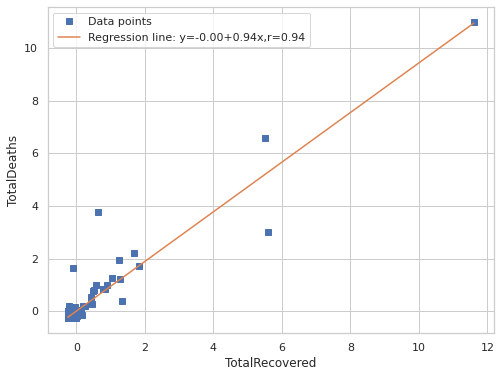

In [45]:
X = df["TotalRecovered"]
Y = df["TotalDeaths"]
corr(X, Y)

### TotalCases và TotalRecovered

KendalltauResult(correlation=0.9405521051280433, pvalue=3.81257148582718e-96)


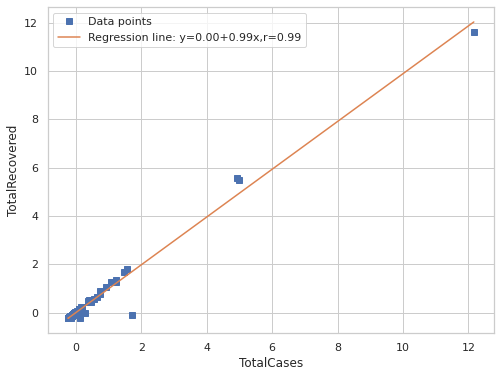

In [46]:
X = df["TotalCases"]
Y = df["TotalRecovered"]
corr(X, Y)

### TotalCases và ActiveCases

KendalltauResult(correlation=0.7460515835375857, pvalue=4.693719136193915e-61)


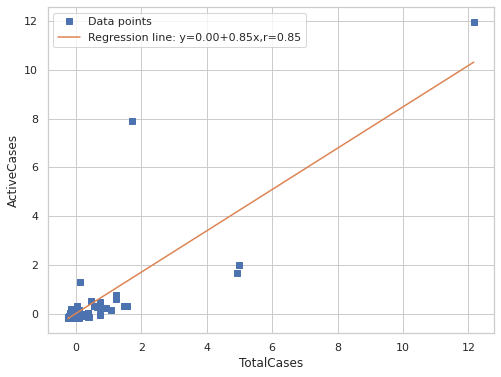

In [47]:
X= df["TotalCases"]
Y=df["ActiveCases"]
corr(X, Y)

### ActiveCases và TotalRecovered

KendalltauResult(correlation=0.5915265850869394, pvalue=4.9590520045053326e-39)


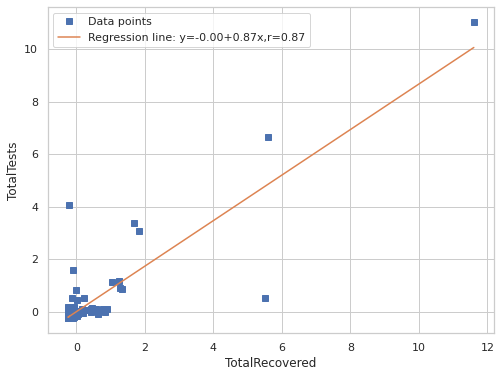

In [48]:
X =df["TotalRecovered"]
Y =df["TotalTests"]
corr(X, Y)

## Một số mối quan hệ khác

### Tỉ lệ TotalCases/TotalTests giữa các nước

<AxesSubplot:title={'center':'Tỉ lệ TotalCases/TotalTests giữa các nước'}, ylabel='Country,Other'>

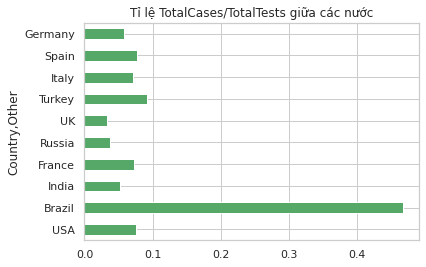

In [49]:
(df_10["TotalCases"]/df_10["TotalTests"]).plot(kind='barh', color='g', title = "Tỉ lệ TotalCases/TotalTests giữa các nước")

        Brazil có số lượng xét nghiệm thấp hơn rất nhiều số ca mắc bệnh

### Tỉ lệ TotalTests/Population giữa các nước

<AxesSubplot:title={'center':'Tỉ lệ TotalTests/Population giữa các nước'}, ylabel='Country,Other'>

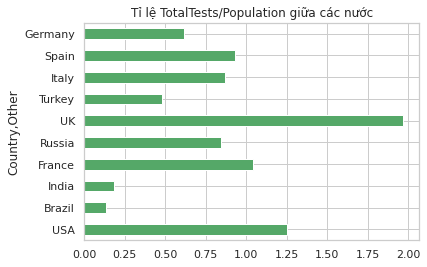

In [50]:
(df_10["TotalTests"]/df_10["Population"]).plot(kind='barh', color='g', title = "Tỉ lệ TotalTests/Population giữa các nước")

        Anh và Mỹ có tỉ lệ người dân xét nghiệm covid trung bình lớn hơn nhiều so với các nước khác

### Tỉ lệ TotalRecovered/TotalCases giữa các nước

<AxesSubplot:title={'center':'Tỉ lệ TotalRecovered/TotalCases giữa các nước'}, ylabel='Country,Other'>

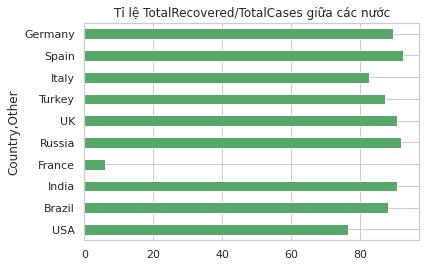

In [51]:
(df_10["TotalRecovered"]*100/df_10["TotalCases"]).plot(kind='barh', color='g', title = "Tỉ lệ TotalRecovered/TotalCases giữa các nước")

        Tỉ lệ hồi phục ở các nước nói trên tương đối cao

### Tổng TotalDeaths,TotalRecovered, ActiveCases là TotalCases

<AxesSubplot:>

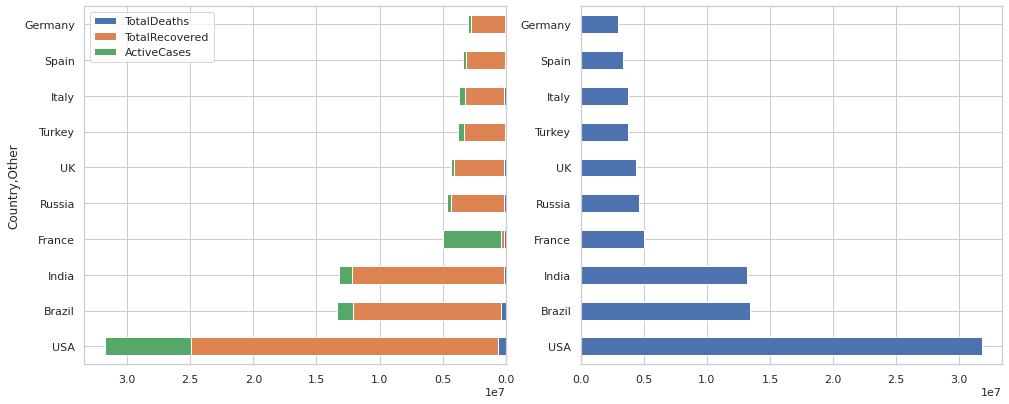

In [52]:
fig, axs = plt.subplots(1,2)
fig.tight_layout(w_pad=-0.75)
df_10[["TotalDeaths", "TotalRecovered", "ActiveCases"]].plot(kind='barh', stacked=True, figsize=(15, 6), ax=axs[0])
axs[0].set_yticks
axs[0].invert_xaxis()
df_10["TotalCases"].plot(kind='barh', stacked=True, figsize=(15, 6), ax=axs[1], xlabel="")

# Hướng tiếp cận thứ hai

In [53]:
df = pd.read_csv("../data/coronavirus/coronavirus0429.csv", index_col="Country,Other")
df.head()
# lab/DataVisualization/data/coronavirus0429.csv

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Date,1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl,Continent,New Cases/1M pop
"Country,Other",,,,,,,,,,,,,,,,,
USA,"31,802,772",NaN,"574,840",NaN,"24,346,766",NaN,"6,881,166","9,078","95,647","1,729","416,789,330","1,253,501","332,500,290",2021-04-10,NaN,NaN,nan
Brazil,"13,375,414",NaN,"348,934",NaN,"11,791,885",NaN,"1,234,595","8,318","62,582","1,633","28,600,000","133,817","213,724,704",2021-04-10,NaN,NaN,nan
India,"13,205,926","+3,143","168,467",NaN,"11,990,859","+2,919","1,046,600","8,944","9,498",121,"255,214,803","183,547","1,390,456,911",2021-04-10,NaN,NaN,nan
France,"4,980,501",NaN,"98,395",NaN,"303,639",NaN,"4,578,467","5,729","76,172","1,505","68,007,540","1,040,108","65,385,105",2021-04-10,NaN,NaN,nan
Russia,"4,623,984",NaN,"102,247",NaN,"4,248,700",NaN,"273,037","2,300","31,675",700,"123,000,000","842,565","145,982,840",2021-04-10,NaN,NaN,nan


In [54]:
obj_col = set(df.select_dtypes(include=['object']).columns)-set(["Date"])
def convert(df):
    if df.name in obj_col:
        df = pd.to_numeric(df.str.replace(",", ""), errors='coerce')
    return df
# df=df.apply(convert)

In [55]:
df = df[["TotalCases", "NewCases", "TotalDeaths", "TotalRecovered", "ActiveCases", "Serious,Critical", "TotalTests", "Population", "NewDeaths"]].sort_values('NewCases', ascending=False)
df

,TotalCases,NewCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,NewDeaths
"Country,Other",,,,,,,,,
Slovakia,"380,010",+99,"11,531","255,300","113,179",341,"2,589,457","5,461,802",+36
Timor-Leste,"2,048",+99,3,972,"1,073",NaN,"61,902","1,338,885",NaN
Qatar,"193,952",+989,357,"171,985","21,610",489,"1,825,071","2,807,805",9.0
Bolivia,"283,084",+989,"12,469","232,422","38,193",71,"999,531","11,796,807",18.0
Palestine,"280,741",+988,"3,017","247,359","30,365",170,"1,679,032","5,194,856",+34
...,...,...,...,...,...,...,...,...,...
Vanuatu,4,NaN,1,3,0,NaN,470,"313,016",NaN
Marshall Islands,4,NaN,,4,0,NaN,NaN,"59,519",NaN
Samoa,3,NaN,,2,1,NaN,NaN,"199,499",NaN


In [56]:
df=df.apply(convert)

In [57]:
df.dtypes

TotalCases            int64
NewCases            float64
TotalDeaths         float64
TotalRecovered      float64
ActiveCases         float64
Serious,Critical    float64
TotalTests          float64
Population          float64
NewDeaths           float64
dtype: object

In [58]:
def missing_ratio(df):
    return df.isna().sum()/len(df)

missing_ratio = df.loc[:,df.columns != "Date"].apply(missing_ratio)#.apply('{:.3%}'.format)
sum=  df.loc[:,df.columns != "Date"].agg('sum').apply('{:3}'.format)
info_df = pd.DataFrame([missing_ratio, sum], index=["Missing Ratio", "Sum"])
info_df

,TotalCases,NewCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,NewDeaths
Missing Ratio,0.00,0.75,0.07,0.00,0.00,0.33,0.05,0.01,0.81
Sum,2861497334.0,3417400.0,61011071.0,2409948482.0,381778189.0,2161344.0,41394652220.0,156392148769.0,61470.0


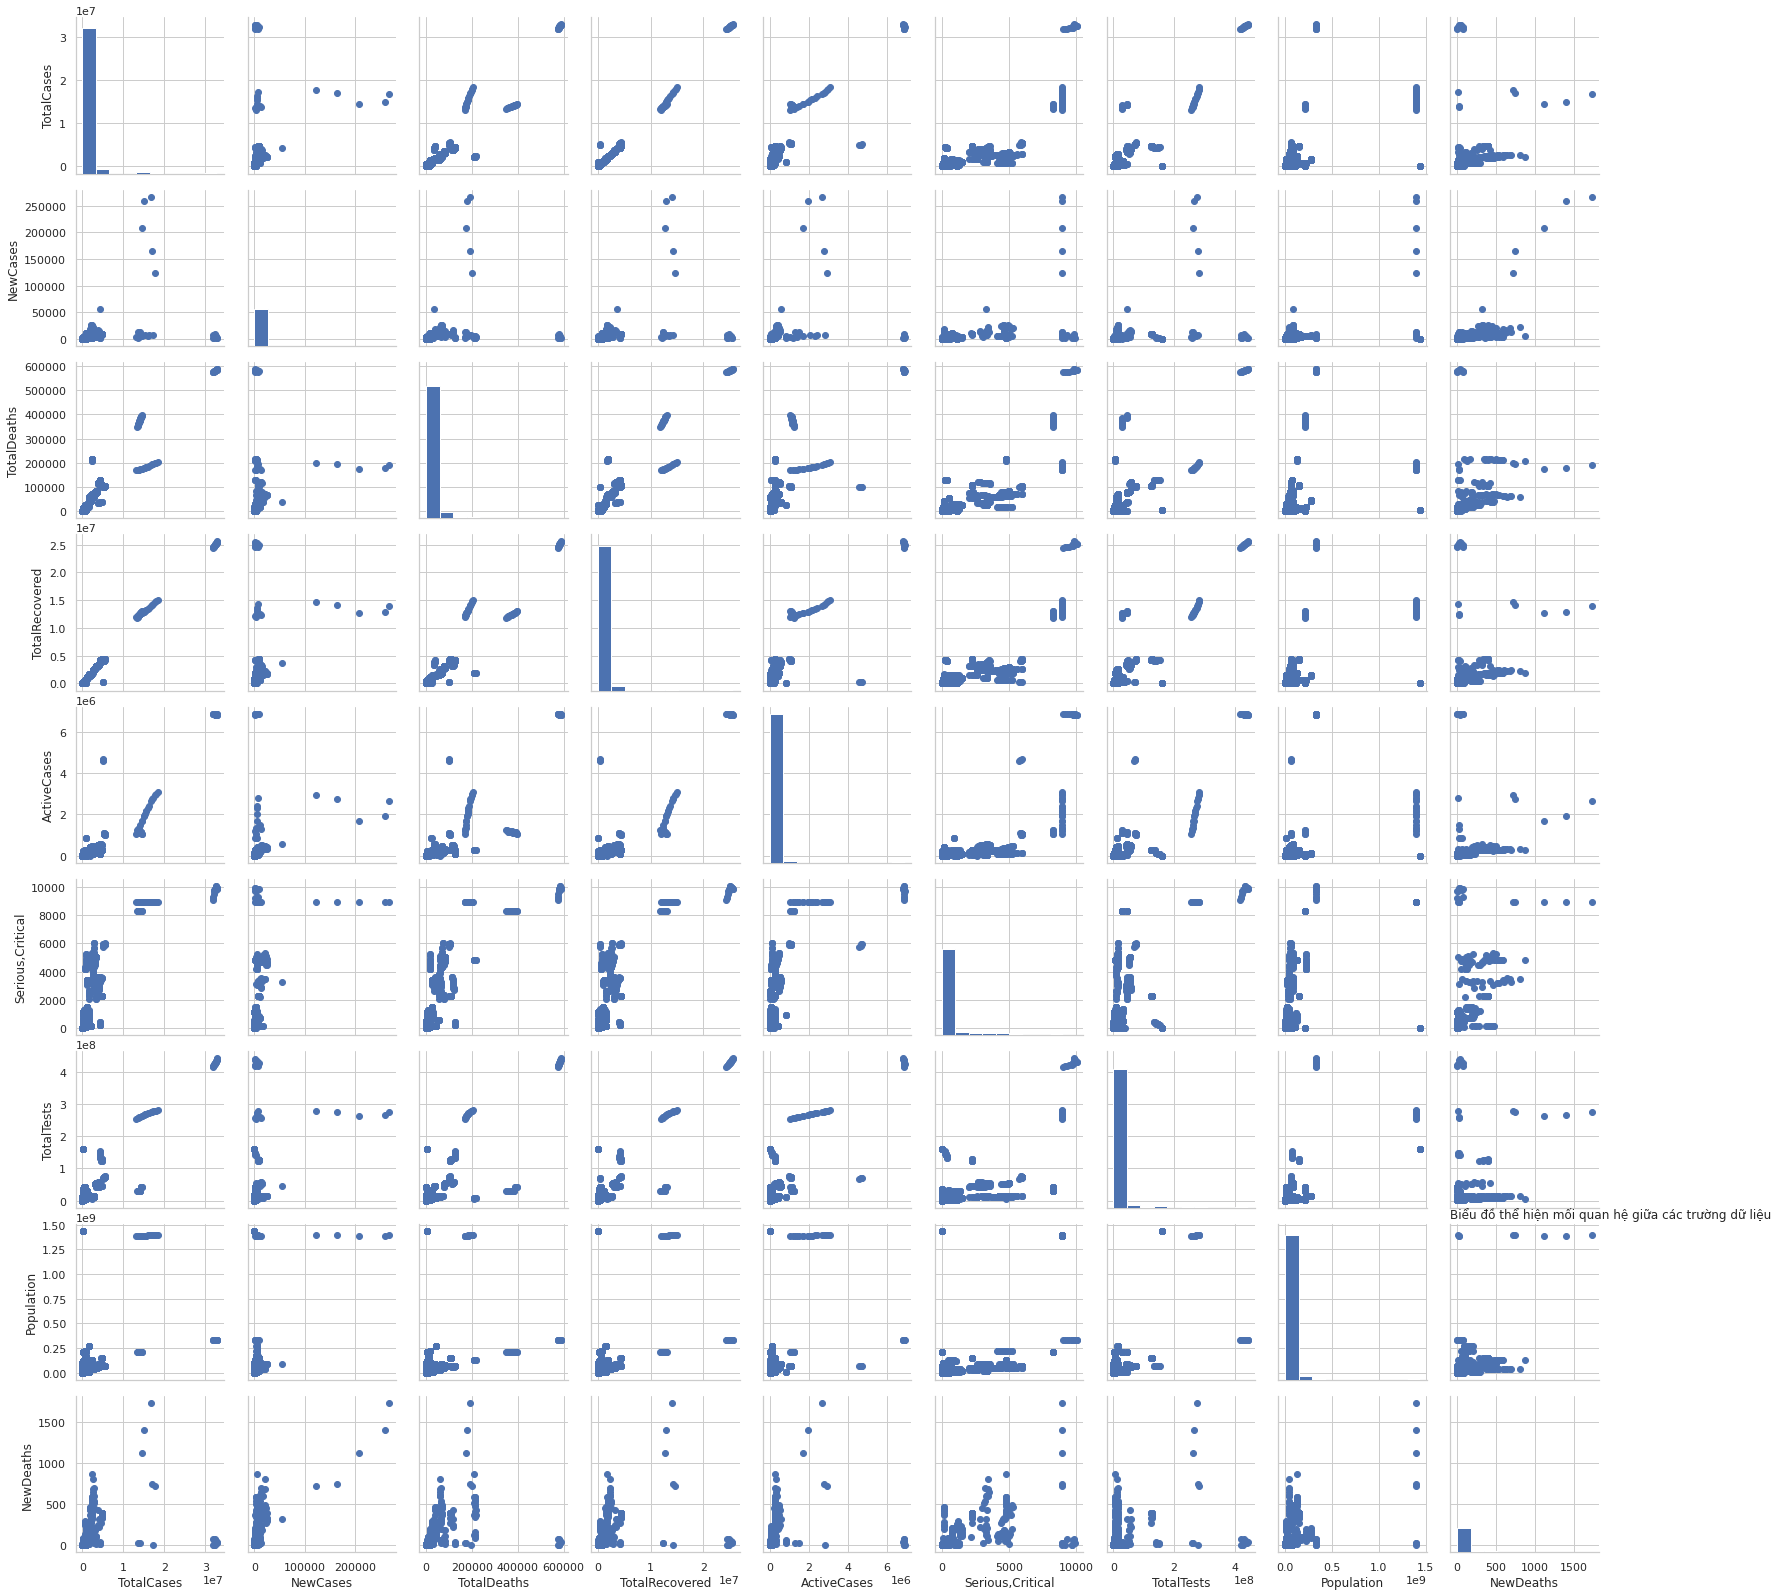

In [59]:
g = sns.PairGrid(df)
# g.map(plt.scatter)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.title("Biểu đồ thể hiện mối quan hệ giữa các trường dữ liệu", loc='left')
plt.show()

## Trường dữ liệu NewCases

In [60]:
feature = "NewCases"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của NewCases


count     1084.00
mean      3152.58
std      14775.90
min          1.00
25%         70.75
50%        734.00
75%       2589.25
max     267369.00
Name: NewCases, dtype: float64

Text(0.5, 0, 'NewCases')

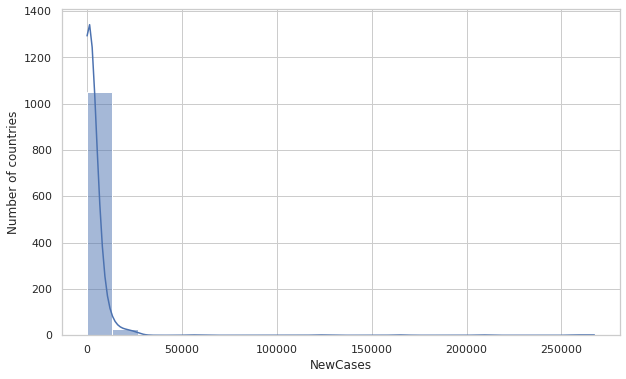

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

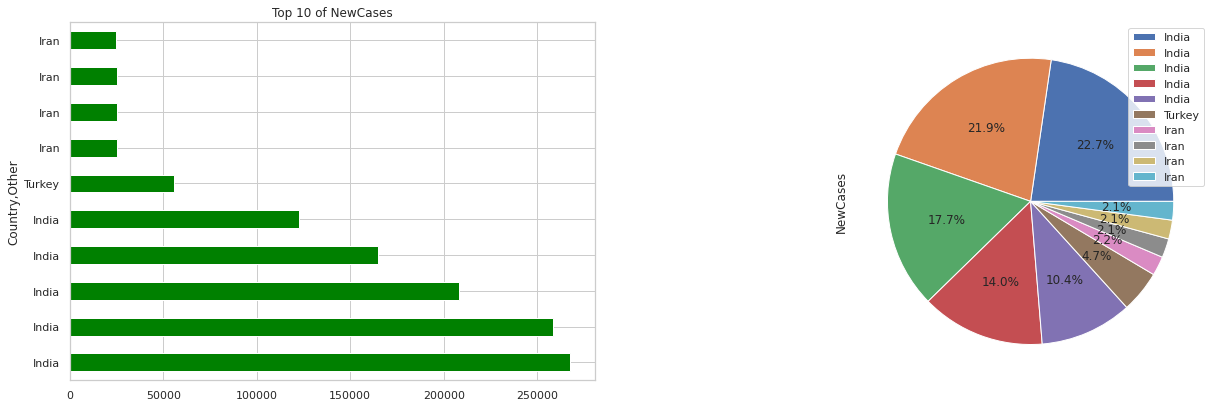

In [62]:
draw(df, top, feature)

## Trường dữ liệu NewDeaths

In [63]:
feature = "NewDeaths"
print("Một số tính chất của", feature)
df[feature].describe()

Một số tính chất của NewDeaths


count    820.00
mean      74.96
std      155.64
min        1.00
25%        4.00
50%       15.00
75%       54.75
max     1732.00
Name: NewDeaths, dtype: float64

Text(0.5, 0, 'NewDeaths')

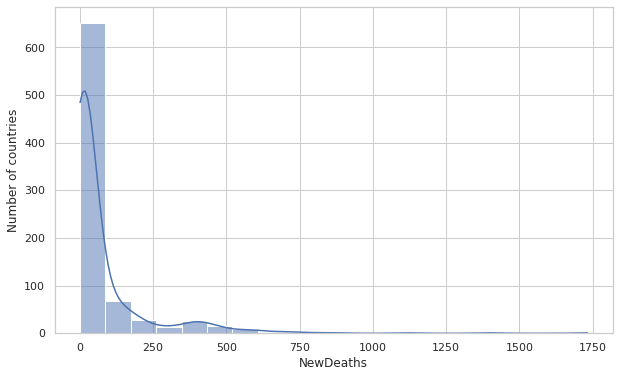

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df[feature],  bins=20, kde=True)
plt.ylabel("Number of countries")
plt.xlabel(feature)

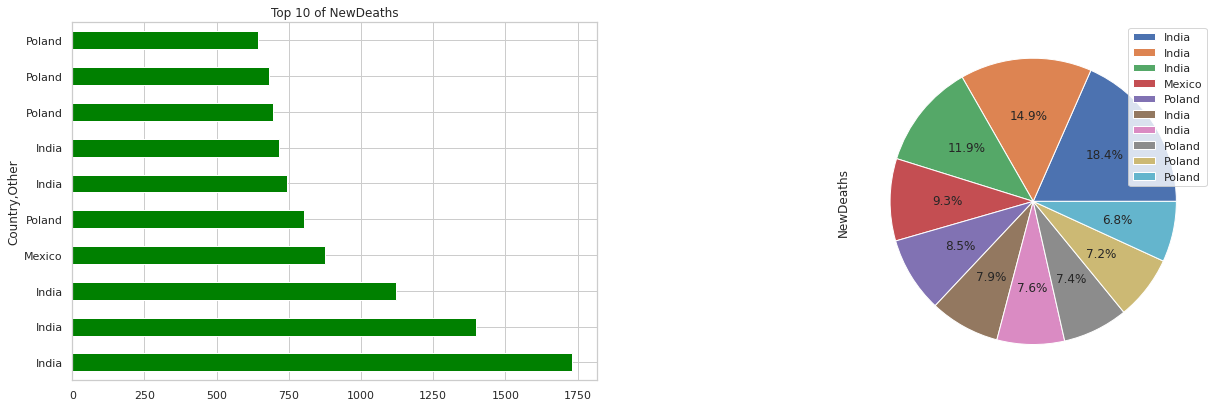

In [65]:
draw(df, top, feature)

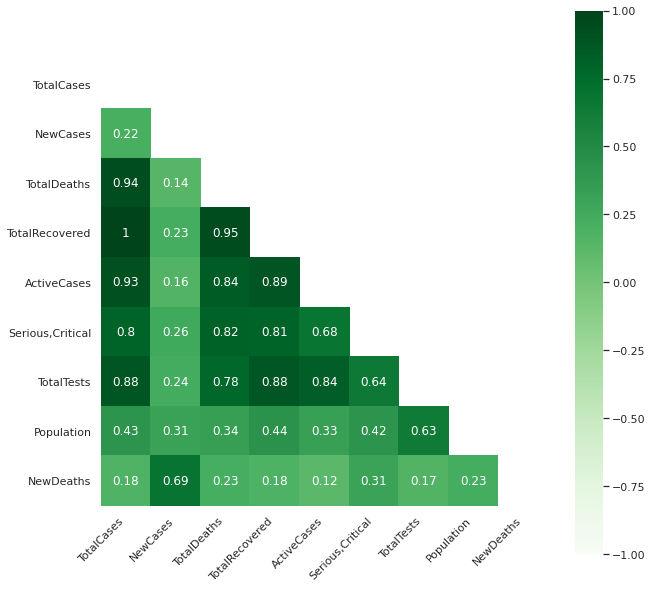

In [66]:
num_cols =df.select_dtypes(exclude='object').columns
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
colTransform = ColumnTransformer(transformers =[('numerical', imp_mean, num_cols)])
colNormalize=StandardScaler()
new_df = colTransform.fit_transform(df)
new_df = colNormalize.fit_transform(new_df)
df = pd.DataFrame(new_df, columns = ["TotalCases", "NewCases", "TotalDeaths", "TotalRecovered", "ActiveCases", "Serious,Critical", "TotalTests", "Population", "NewDeaths"])
corr = df.corr(method='pearson')
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(
    corr, 
    annot=True,
    vmin=-1, vmax=1, center=0,
    cmap = 'Greens',
#     cmap=sns.diverging_palette(20, 20, n=240),
    mask = mask,
    square=True,
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Ta nhận thấy độ tương quan của NewCases và NewDeaths với các thuộc tính khác không lớn. Vậy ta bỏ qua hướng tiếp cận này, trở lại hướng tiếp cận đầu (dựa theo ToalCases)